## Machine Learning Coursework (Part 1)

For the coursework, please make sure to implement your own code and not use libraries (except where explicitly asked). You will need to present your own code that performs nested cross-validation and the k-nearest neighbour algorithm, build confusion matrices, and estimate distances between data samples.

The purpose of this coursework is to help you:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- don't use libraries that implement kNN or cross-validation.  We want to see your code!
- Remember to comment all of your code (see here for tips: https://stackabuse.com/commenting-python-code/). You can also make use of Jupyter Markdown, where appropriate, to improve the layout of your code and documentation.
- Please add docstrings to all of your functions (so that users can get information on inputs/outputs and what each function does by typing SHIFT+TAB over the function name. For more detail on python docstrings, see here: https://numpydoc.readthedocs.io/en/latest/format.html)
- When a question allows a free-form answer (e.g. what do you observe?), create a new markdown cell below and answer the question in the notebook. 
- Always save your notebook when you are done (this is not automatic)!
- Upload your completed notebook using the VLE

Plagiarism: please make sure that the material you submit has been created by you. Any sources you use for code should be properly referenced. Your code will be checked for plagiarism using appropriate software.

### Marking 

The grades in this coursework are allocated approximately as follows:

|                                                    | mark  |  
|----------------------------------------------------|-------|
| Data exploration (+ 2 questions)                   | 10     |  
| Code, docu. & comments (KNN + Evaluation + NCV)    | 10    |  
| Results (KNN folds + Summary + Confusion matrices) | 10     |  
| Final questions:                                   | 10     |  
| Overall quality & use of Markdown                  | 10     |  
| Total available                                    |**50** |  


## 1. Exploratory Data Analysis 

In this coursework we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data

The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand.  When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features. 

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises. 

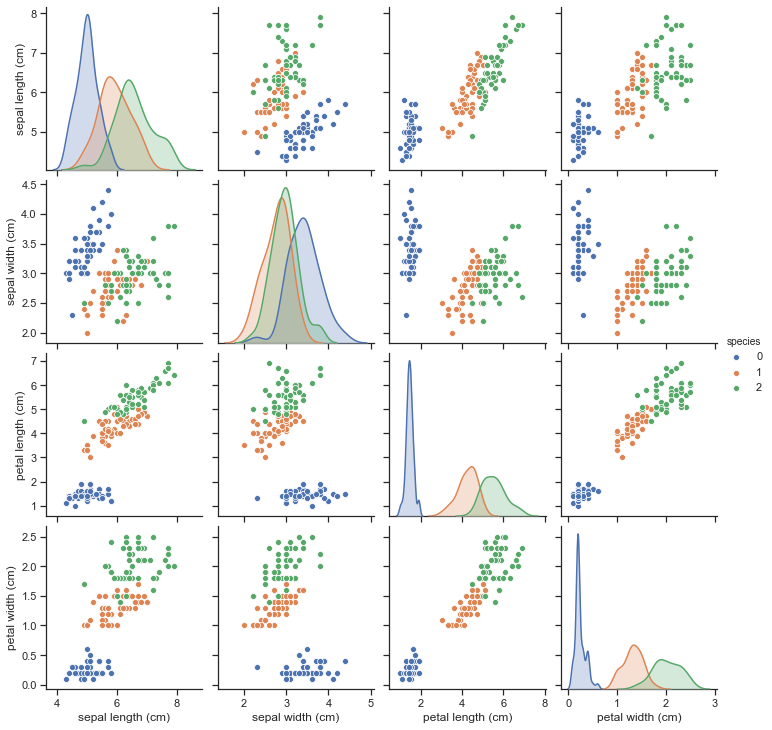

Your first task is to recreate a similar grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.     

You should create a function that, given data X and labels y, plots this grid.  The function should be invoked something like this:
        
    myplotGrid(X,y,...)
    
where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this. 


#### 1.1. Visualising the data

To plot the data individually, we loop through ranges of 4 for a 4x4 plot. Depending on the axes of the plot, we draw each feature against another. For axes that have the same feature, we use seaborn to plot one feature with different classes.

Code from myplotGrid(X,y) is referenced from https://stackoverflow.com/questions/62402374/scatter-matrix-for-iris-data.

In [2]:
# define plotting function
import seaborn as sns

def myplotGrid(X,y):
    """
    This function plots off-diagonal subplots that shows the interaction between two features with different classes.
    
    Parameters
    ----------
    X = numpy array of different fields
    y = classes (target data)
    """
    rgb = np.array(['tomato', 'cornflowerblue', 'limegreen'])
    fig = plt.figure(figsize=(13, 13))
    t = 1
    for i in range(4):
        for j in range(4):
            # when i == j, we cannot compare the same values against each other, it will result in a diagonal scatter plot
            # so instead, we plot a seaborn plot
            if i == j:
                fig.add_subplot(4, 4, t)
                for k in range(3):
                    snsplot = sns.kdeplot(X[:, j][y == k], shade=True, alpha=0.3, color=rgb[k])
                    snsplot.set(ylabel = None)
            # plot the rest as per normal
            elif i != j:
                fig.add_subplot(4, 4, t)
                plt.scatter(X[:, j], X[:, i], c=rgb[y], s=40, edgecolors='white', cmap=plt.cm.Paired)
            # adding labels
            if i == 3 and j <= 3:
                plt.xlabel(selected_features[j])
            if j == 0 and i <= 3:
                plt.ylabel(selected_features[i])
            # removing ticks
            ax = plt.gca()
            if j == 0 and i < 3:
                ax.axes.xaxis.set_ticklabels([])
            elif i == 3 and j > 0:
                ax.axes.yaxis.set_ticklabels([])
            elif j == 0 and i == 3:
                pass
            else:
                ax.axes.yaxis.set_ticklabels([])
                ax.axes.xaxis.set_ticklabels([])

            t += 1

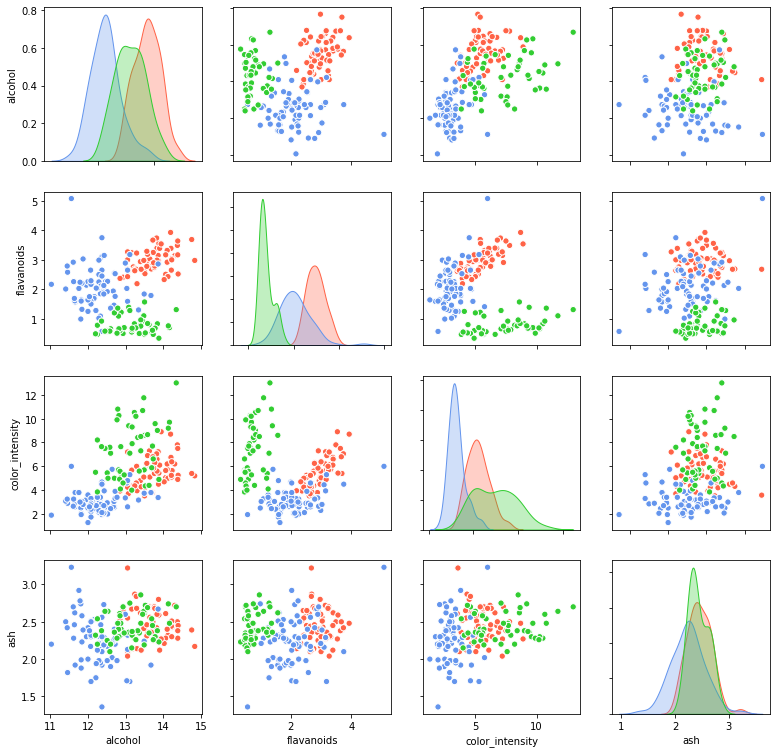

In [3]:
# run the plotting function
myplotGrid(X,y)

### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

    # initialize random seed to replicate results over different runs
    mySeed = 12345 
    np.random.seed(mySeed) 
    XN=X+np.random.normal(0,0.6,X.shape)
    
and then invoke

    myplotGrid(XN,y)

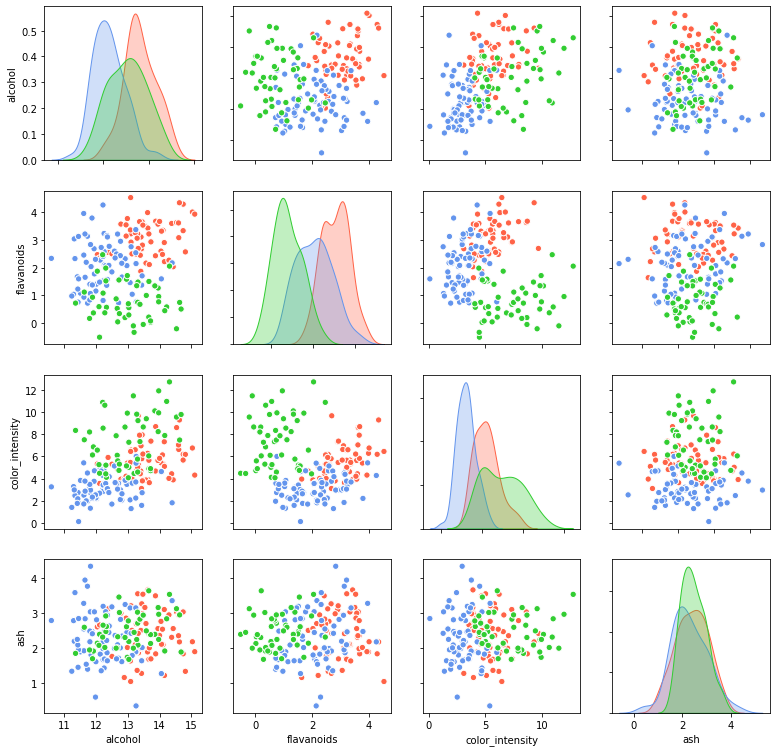

In [4]:
# noise code
mySeed = 12345 
np.random.seed(mySeed) 
XN = X + np.random.normal(0, 0.6, X.shape)

myplotGrid(XN,y)


### Q1. Exploratory data analysis
Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why?  Answer as fully as you can. 


answer: **Color_intensity and alcohol. The scatter plots looks the closest to a linear relationship, which would be best for calculating k-nearest neighbours.**


### Q2. Data with noise
What do you observe by plotting the data without noise compared to plotting with added Gaussian noise? 


answer: **The data without the noise seems more compact, while the one with Gaussian noise is more dispersed, but both maintain the same shape.**

## 2. Implementing kNN 

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions. 

Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector. 


In [5]:
# helper code
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train_scikit, X_test_scikit, y_train_scikit, y_test_scikit = train_test_split(X, y, test_size = 0.2)
knn = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean')
knn.fit(X_train_scikit, y_train_scikit)
y_scikit = knn.predict(X_test_scikit)

#### 2. Implementing kNN
Explanation for the following codes are placed in comments within the functions.

Code from shuffle_split_data(X,y,test_size) referenced from https://stackoverflow.com/questions/47202182/train-test-split-without-using-scikit-learn?rq=1.

Code from eucledian_distance(p1, p2) referenced from https://github.com/NoamYakarOfficial/Machine-Learning-Club-Student-Led-Workshop-KNN-From-Scratch/blob/main/machine-learning-club-asu-knn-algorithm-scratch.ipynb.

Code from mykNN(X,y,X_,options) referenced from https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch and https://alexkaiser.dev/2020-06-25-k-Nearest-Neighbors-in-Python-from-Scratch/.

In [6]:
# mykNN code
def shuffle_split_data(X, y, test_size):
    """
    Splits data into training and test sets, based on test size.
    
    Parameters
    ----------
    X = numpy array
    y = target data
    test_size = percentage of data to be test size (e.g. 0.2)
    
    Return
    ------
    X_train = X training data
    y_train = y training data
    X_test = X test data
    y_test = y test data
    """
    # initialize an index list
    indices = list(range(X.shape[0]))
    # get 80% of values for training set
    num_training_indices = int((1 - test_size) * X.shape[0])
    # shuffle the indices
    np.random.shuffle(indices)
    # front 80% as training indices
    train_indices = indices[:num_training_indices]
    # back 20% as test indices
    test_indices = indices[num_training_indices:]
    # get X_train, y_train, X_test, y_test
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]    
    return X_train, y_train, X_test, y_test

def eucledian_distance(p1, p2):
    """
    Calculates the distance between two points (euclidean).
    
    Parameters
    ----------
    p1 = numeric value
    p2 = numeric value
    
    Return
    ------
    distance
    """
    distance = np.sqrt(np.sum((p1 - p2) ** 2))
    return distance

def mykNN(X,y,X_,options):
    """
    Finds the k-Nearest Neighbours and predict.
    
    Parameters
    ----------
    X = X training data
    y = y training data
    X_ = X test data
    options = number of neighbours
    
    Return
    ------
    y_ = predicted values
    """
    y_ = []
    # looping through the test data
    for item in X_:
        # array to store distances between two points
        point_dist = []
        # loop through X training data
        for j in range(len(X)):
            # calculating distances between two points
            distances = eucledian_distance(np.array(X[j,:]) , item)
            point_dist.append(distances)
        point_dist = np.array(point_dist)
        neighbors = np.argsort(point_dist)[:options]
        # dict to count occurences in y training data
        count_neighbors = {}
        for val in neighbors:
            if y[val] in count_neighbors:
                count_neighbors[y[val]] += 1
            else:
                count_neighbors[y[val]] = 1
        # max count labels to y_
        y_.append(max(count_neighbors, key=count_neighbors.get))
    return y_

X_train, y_train, X_test, y_test = shuffle_split_data(X, y, 0.2)
y_ = mykNN(X_train, y_train, X_test, 10)

print('y_test       ', y_test) # true values
print('y_           ', y_) # predicted values
print('y_test_scikit', y_test_scikit) # true values using scikit
print('y_scikit     ', y_scikit) # predicted values using scikit

y_test        [2 2 2 1 0 1 1 2 1 2 1 2 2 0 1 0 0 0 1 1 1 1 1 2 0 2 0 1 1 0 0 1 1 0 0 1]
y_            [2, 2, 2, 1, 0, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1]
y_test_scikit [2 2 0 0 1 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 1 2 1 0 0 2 2 1]
y_scikit      [2 2 0 0 0 2 2 1 2 0 2 1 2 2 2 0 1 2 2 1 0 2 0 1 1 0 0 1 0 2 1 0 0 2 2 1]


## 3. Classifier evaluation 

In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy. 

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions. 


#### 3. Classifier evaluation 
Code for classifiers referenced from COURSERA labs: https://www.coursera.org/learn/uol-cm3015-machine-learning-and-neural-networks/ungradedLab/ILfil/2-601-classification/lab?path=%2Fnotebooks%2FSolutions%2F2.2%2520ANSWERS%2520KNN%2520classification.ipynb

In [7]:
# confusion matrix, accuracy, precision, recall, etc.

def myConfMat(y_ground,y_pred,classno):
    """Creates a matrix with entries equal to zero, and build the confusion matrix. Returns the confusion matrix in a numpy array."""
    C= np.zeros((classno,classno),dtype=int)
    for i in range(0,len(y_ground)):
            C[y_ground[i],y_pred[i]]+=1
    return C

def myAccuracy(y_ground,y_pred):
    """Returns the accuracy given the true/predicted labels."""
    correct = np.where(y_ground==y_pred, 1, 0 )
    total = len(y_ground)
    return sum(correct)/total

def myPrecision(y_ground,y_pred):
    classes = np.unique(y_ground)
    precision = np.zeros(classes.shape) 
    C = myConfMat(y_ground,y_pred,len(classes))
    for i in classes:
        precision[i] = C[i,i] / sum(C[:,i])
    return precision

def myRecall(y_test,y_pred):
    classes = np.unique(y_pred)
    recall = np.zeros(classes.shape) 
    C = myConfMat(y_test,y_pred,len(classes))
    for i in classes:
        recall[i] = C[i,i] / sum(C[i,:])
    return recall

In [8]:
# test evaluation code
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

sklearn conf matrix
 [[11  0  0]
 [ 2 13  1]
 [ 0  0  9]]
myConfMat
 [[11  0  0]
 [ 2 13  1]
 [ 0  0  9]]


<AxesSubplot:>

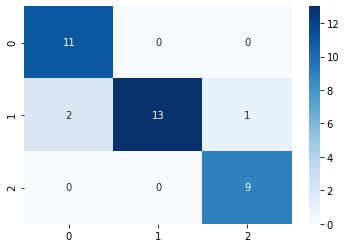

In [9]:
print('sklearn conf matrix\n', confusion_matrix(y_test,y_))
C = myConfMat(y_test,y_,len(np.unique(y)))
print('myConfMat\n', C)
sns.heatmap(C, annot=True, fmt='d', cmap='Blues')

In [10]:
print('sklearn accuracy %.2f' % accuracy_score(y_test,y_))
print('myAccuracy       %.2f' % myAccuracy(y_test,y_))

sklearn accuracy 0.92
myAccuracy       0.92


In [11]:
print('sklearn precision %s' % precision_score(y_test,y_,average=None))
print('myPrecision       %s' % myPrecision(y_test,y_))

sklearn precision [0.84615385 1.         0.9       ]
myPrecision       [0.84615385 1.         0.9       ]


In [12]:
print('sklearn recall %s' % recall_score(y_test,y_,average=None))
print('myRecall       %s' % myRecall(y_test,y_))

sklearn recall [1.     0.8125 1.    ]
myRecall       [1.     0.8125 1.    ]



## 4. Nested Cross-validation using your implementation of KNN  

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes. 

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

    accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan',...]`` evaluates the distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- you should perform nested cross-validation on **both** your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
- you should evaluate **at least** two distance functions
- you should evaluate number of neighbours from 1 to 10
- your function should return a list of accuracies per fold
- for each **fold**, your function should print:
  - the accuracy per distinct set of parameters on the validation set
  - the best set of parameters for the fold after validation
  - the confusion matrix per fold (on the testing set)


#### 4. Nested Cross-validation using your implementation of KNN
Explanation for the following codes are placed in comments within the functions.

Code for myNestedCrossVal(X,y,k,r,metric) referenced from https://github.com/rasbt/stat451-machine-learning-fs20/blob/master/L11/code/11-eval4-algo__nested-cv_compact.ipynb and https://github.com/chaitanyakasaraneni/knnFromScratch/blob/master/knnWithKFCV.ipynb.

In [13]:
# myNestedCrossVal code
def manhattan_distance(p1, p2):
    """
    Calculates the distance between two points (manhattan).
    
    Parameters
    ----------
    p1 = numeric value
    p2 = numeric value
    
    Return
    ------
    distance
    """
    distance = np.abs(np.array(p1) - np.array(p2)).sum()
    return distance

def kFoldSplit(X, y, k):
    """
    Shuffles data into the correct size for k-fold
    
    Parameters
    ----------
    X = numpy array
    y = classes
    k = number of folds
    
    Return
    ------
    X_fold
    y_fold
    """
    # find size for each fold
    size = int(X.shape[0] / k)
    # initialize a list of indices as a range size*k
    indices = list(range(size*k))
    # shuffle the indinces
    np.random.shuffle(indices)
    # copy X into X_fold with shuffled indices
    X_fold = X[indices]
    # copy y into y_fold with shuffled indices
    y_fold = y[indices]
    
    return X_fold, y_fold

# I have copied and renamed mykNN to kFoldkNN as to not bother the original code
# kFoldkNN calculates two distances unlike mykNN which calculates using only one distance metric
def kFoldkNN(X,y,X_,options,metric):
    """
    Finds the k-Nearest Neighbours and predict using two distance metrics.
    
    Parameters
    ----------
    X = X training data
    y = y training data
    X_ = X test data
    options = number of neighbours
    metric = ['euclidean','manhattan']
    
    Return
    ------
    y_eucl = predicted values using euclidean distances
    y_manh = predicted values using manhattan distances
    """
    # global variables of predicted values
    y_eucl = []
    y_manh = []
    # loop through metrics
    for i in metric:
        # using euclidean distances
        if i == 'euclidean':
            for item in X_:
                point_dist = []
                for j in range(len(X)):
                    distances = eucledian_distance(np.array(X[j,:]) , item)
                    point_dist.append(distances)
                point_dist = np.array(point_dist)
                neighbors = np.argsort(point_dist)[:options]
                count_neighbors = {}
                for val in neighbors:
                    if y[val] in count_neighbors:
                        count_neighbors[y[val]] += 1
                    else:
                        count_neighbors[y[val]] = 1
                y_eucl.append(max(count_neighbors, key=count_neighbors.get))
        # using manhattan distances
        if i == 'manhattan':
            for item in X_:
                point_dist = []
                for j in range(len(X)):
                    distances = manhattan_distance(np.array(X[j,:]) , item)
                    point_dist.append(distances)
                point_dist = np.array(point_dist)
                neighbors = np.argsort(point_dist)[:options]
                count_neighbors = {}
                for val in neighbors:
                    if y[val] in count_neighbors:
                        count_neighbors[y[val]] += 1
                    else:
                        count_neighbors[y[val]] = 1
                y_manh.append(max(count_neighbors, key=count_neighbors.get))
                
    return y_eucl, y_manh

# i have removed mySeed as a parameter as XN already exists and i am able to just invoke
# myNestedCrossVal again, only using XN instead of X.
# i have also modified the function to also return a list of confusion matrices
def myNestedCrossVal(X, y, k, r, metric, neighbors):
    """
    Performs nested cross validation.
    
    Parameters
    ----------
    X = numpy array
    y = classes
    k = number of folds
    r = range of neighbour parameters
    metric = ['euclidean','manhattan']
    
    Returns
    -------
    result = list of outer fold, highest accuracy in fold, from which inner fold, using which distance metric
    matrices = list of confusion matrices using best parameters
    """
    # global variables
    scores_eucl = []
    scores_manh = []
    result = []
    matrices = []
    # invoke kFoldSplit
    X_fold, y_fold = kFoldSplit(X, y, k)
    size = int(len(X)/k)
    # removing each outer fold
    for outer in range(k):        
        # copy each fold while skipping one fold with each loop
        # the way this code works is that i am 'copying' each fold (without the test fold) into a new numpy array
        # the reason i do this is because i could not find a way to split the data in kFoldSplit() without the data type
        # changing, which will then affect the way kFolfkNN() runs.
        # concatenate code referenced from: https://stackoverflow.com/questions/3881453/numpy-add-row-to-array
        X_copy = X_fold[0:(size * outer)]                                           #e.g. for outer loop 0, X_fold[0:0]
        X_copy = np.concatenate((X_copy, X_fold[((size*outer)+size):(size*k)]))     #e.g. for outer loop 0, X_fold[35:175]
        y_copy = y_fold[0:(size * outer)]                                           #e.g. for outer loop 1, y_fold[0:35]
        y_copy = np.concatenate((y_copy, y_fold[((size*outer)+size):(size*k)]))     #e.g. for outer loop 1, y_fold[70:175]
        # temporary variables to store accuracy of each fold
        accuracy_score_eucl = []
        accuracy_score_manh = []
        # temporary variables to store best parameters
        temp = 0
        best_y_test = []
        best_y_ = []
        best_metric = ""  
        best_neighbour = 0
        # training each inner fold
        for inner in range(k-1):
            # splitting data into X_test, X_train, y_test, y_train 
            # similar to how I split X_fold and y_fold into X_copy and y_copy
            X_test = X_copy[(inner*size):((inner*size)+size)]
            X_train = X_copy[0:(inner*size)]
            X_train = np.concatenate((X_train, X_copy[((inner*size)+size):((k-1)*size)]))
            y_test = y_copy[(inner*size):((inner*size)+size)]
            y_train = y_copy[0:(inner*size)]
            y_train = np.concatenate((y_train, y_copy[((inner*size)+size):((k-1)*size)]))            
            # finding nearest neighbors while testing on range(1,11) of neighours
            for i in neighbors:
                y_eucl, y_manh = kFoldkNN(X_train,y_train,X_test,i, metric)
                # calculating accuracy: eucl
                accuracy_eucl = round(myAccuracy(y_test,y_eucl), 2)
                accuracy_score_eucl.append(accuracy_eucl)            
                # calculating accuracy: manh
                accuracy_manh = round(myAccuracy(y_test,y_manh), 2)
                accuracy_score_manh.append(accuracy_manh)            
                # finding best parameter: eucl
                if (accuracy_eucl > temp):
                    temp = accuracy_eucl
                    best_metric = "euclidean"
                    best_neighbour = i
                    best_y_test = y_test
                    best_y_ = y_eucl
                # finding best parameter: manh
                if (accuracy_manh > temp):
                    temp = accuracy_manh
                    best_metric = "manhattan"
                    best_neighbour = i
                    best_y_test = y_test
                    best_y_ = y_manh            
        # storing each fold's accuracy
        scores_eucl.append(list(accuracy_score_eucl))
        scores_manh.append(list(accuracy_score_manh))
        # printing accuracy, best parameters and confusion matrix of best parameters
        print("Best set of parameters for Outer Fold", outer)
        print("y_test           :", best_y_test)
        print("y_               :", best_y_)
        print("Accuracy         :", int(temp*100), "%")
        print("No. of neighbors :", best_neighbour)
        print("Distance metric  :", best_metric, "\n")
        print("Confusion matrix\n", myConfMat(best_y_test,best_y_,len(np.unique(y))), "\n")
        # return each fold best accuracy, k and distance metric
        result.append([(outer+1), int(temp*100), best_neighbour, best_metric])
        matrices.append([myConfMat(best_y_test,best_y_,len(np.unique(y)))])
        
    return result, matrices

In [14]:
# evaluate clean data code
accuracies_fold, clean_matrices = myNestedCrossVal(X, y, 5, list(range(1,11)), ['euclidean','manhattan'], list(range(1,11)))

Best set of parameters for Outer Fold 0
y_test           : [1 2 0 1 0 1 0 1 0 2 1 1 2 2 2 0 0 2 2 0 0 2 2 1 1 1 0 1 0 0 1 1 1 0 0]
y_               : [1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0]
Accuracy         : 97 %
No. of neighbors : 1
Distance metric  : euclidean 

Confusion matrix
 [[13  0  0]
 [ 1 12  0]
 [ 0  0  9]] 

Best set of parameters for Outer Fold 1
y_test           : [2 1 1 1 0 1 0 0 2 1 0 0 0 1 0 2 1 2 0 2 0 2 0 1 0 1 0 1 2 2 1 1 1 1 1]
y_               : [2, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1]
Accuracy         : 97 %
No. of neighbors : 3
Distance metric  : euclidean 

Confusion matrix
 [[12  0  0]
 [ 0 14  1]
 [ 0  0  8]] 

Best set of parameters for Outer Fold 2
y_test           : [1 0 2 1 2 0 2 0 1 0 1 2 1 1 1 2 1 1 1 0 1 2 2 0 2 0 2 1 0 2 1 0 2 1 2]
y_               : [1, 0, 2, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0,

In [15]:
# evaluate noisy data code
accuracies_fold_XN, noisy_matrices = myNestedCrossVal(XN, y, 5, list(range(1,11)), ['euclidean','manhattan'], list(range(1,11)))

Best set of parameters for Outer Fold 0
y_test           : [1 2 2 1 0 1 0 2 2 2 2 0 0 2 1 1 0 1 1 1 1 0 2 2 2 0 0 1 1 0 1 0 0 2 0]
y_               : [1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0]
Accuracy         : 97 %
No. of neighbors : 6
Distance metric  : euclidean 

Confusion matrix
 [[12  0  0]
 [ 0 12  0]
 [ 0  1 10]] 

Best set of parameters for Outer Fold 1
y_test           : [0 2 1 1 1 2 0 0 1 1 1 2 0 0 2 2 1 2 1 1 1 0 1 2 1 2 0 1 1 0 0 1 1 0 2]
y_               : [0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2]
Accuracy         : 94 %
No. of neighbors : 6
Distance metric  : euclidean 

Confusion matrix
 [[ 9  1  0]
 [ 1 15  0]
 [ 0  0  9]] 

Best set of parameters for Outer Fold 2
y_test           : [1 2 2 1 0 1 0 2 2 2 2 0 0 2 1 1 0 1 1 1 1 0 2 2 2 0 0 1 1 0 1 0 0 2 0]
y_               : [1, 2, 2, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2,

## 5. Summary of results

Using your results from above, fill out the following table using the **clean** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |

Where **total** is given as an average over all the folds, and $\pm$ the standard deviation.

Now fill out the following table using the **noisy** data:

| Fold | accuracy |  k  | distance |
| --- | --- | --- | --- |
| 1 | .?  |  ? | ?  |
| 2 | .?  |  ? | ?  |
| 3 | .?  |  ? | ?  |
| 4 | .?  |  ? | ?  |
| 5 | .?  |  ? | ?  |
| **total** | .? $\pm$ ? |   |    |


In [16]:
# Print the summaries
accuracies_fold = pd.DataFrame(accuracies_fold, columns = ['Fold', 'Accuracy', 'k', 'Distance'])
print("CLEAN")
print("total", np.average(accuracies_fold['Accuracy']), "±", np.std(accuracies_fold['Accuracy']))
accuracies_fold

CLEAN
total 98.2 ± 1.4696938456699067


,Fold,Accuracy,k,Distance
0,1,97,1,euclidean
1,2,97,3,euclidean
2,3,100,1,euclidean
3,4,97,1,manhattan
4,5,100,6,euclidean


In [17]:
accuracies_fold_XN = pd.DataFrame(accuracies_fold_XN, columns = ['Fold', 'Accuracy', 'k', 'Distance'])
print("NOISY")
print("total", np.average(accuracies_fold_XN['Accuracy']), "±", np.std(accuracies_fold_XN['Accuracy']))
accuracies_fold_XN

NOISY
total 94.6 ± 2.244994432064365


,Fold,Accuracy,k,Distance
0,1,97,6,euclidean
1,2,94,6,euclidean
2,3,94,6,euclidean
3,4,97,4,euclidean
4,5,91,4,manhattan


### 5.2. Confusion matrix summary

Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your ```myNestedCrossVal``` code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall. 


In [18]:
print('CLEAN')
for i in range(len(clean_matrices)):
    print("fold", (i+1), "\n", clean_matrices[i], "\n")

CLEAN
fold 1 
 [array([[13,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  9]])] 

fold 2 
 [array([[12,  0,  0],
       [ 0, 14,  1],
       [ 0,  0,  8]])] 

fold 3 
 [array([[ 9,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 12]])] 

fold 4 
 [array([[12,  0,  0],
       [ 0, 14,  1],
       [ 0,  0,  8]])] 

fold 5 
 [array([[ 9,  0,  0],
       [ 0, 14,  0],
       [ 0,  0, 12]])] 



In [19]:
print('NOISY')
for i in range(len(noisy_matrices)):
    print("fold", (i+1), "\n", noisy_matrices[i], "\n")

NOISY
fold 1 
 [array([[12,  0,  0],
       [ 0, 12,  0],
       [ 0,  1, 10]])] 

fold 2 
 [array([[ 9,  1,  0],
       [ 1, 15,  0],
       [ 0,  0,  9]])] 

fold 3 
 [array([[11,  1,  0],
       [ 0, 12,  0],
       [ 1,  0, 10]])] 

fold 4 
 [array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0,  9]])] 

fold 5 
 [array([[11,  1,  0],
       [ 1, 11,  0],
       [ 1,  0, 10]])] 



## 6. More questions 

Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.



### Q3.	 Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used? 


Answer: **When adding noise to the data, the data only seem to become more spread out. However, it does not mean that the best parameters change and even if they do, not too drastically. It's not possible to declare that one parameter is clearly better than another, because with nested cross validation, we are testing the data with different metrics too. There could be other metrics that we did not use that could output a higher accuracy than using clean data with euclidean distances (100%). The distances also may not play a part, but the number of neighbours to. As seen in the clean data, in Fold 2, the perfect accuracy is achieved with 1 neighbor, while in Fold 5, the perfect accuracy is achieved with 6 neighbors.**

### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

Answer: **We can break the tie by checking for the number of neighbours. If the number of neighbours is even (divisble by 2), we can raise the number of neighbours by 1. An odd number selection of neighbours guarantee that there is no possible tie.**

**if (number_of_neighbours % 2 == 0):
    number_of_neighbours += 1**

### Q5.	Beyond Wine 
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code. 


Answer: **I would revise my kNN code and make it more efficient. The dataset for which we are testing on is quite small, and other datasets could be much larger.**